<a href="https://colab.research.google.com/github/vijaydaniel45/genai-mermaid/blob/main/Training_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

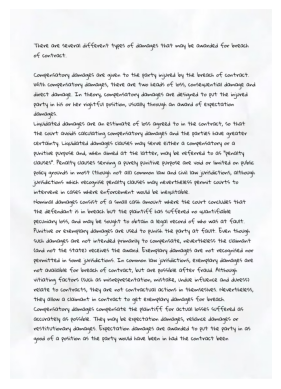

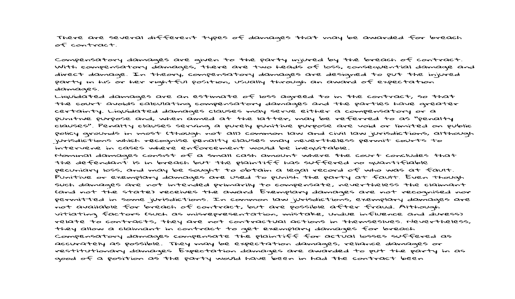

xnewe are several ditterent tyges of damages that may le awarded or reach et contract comgensatory damages ave auen to the arty mywrea by the breach of contract with compensatory damages there are tic leads of 1666 consequential damage ana awect damage en thee compensatory damages ave designed to gut the wyurea pay bn bs oe few wight ui gottion usual theough an awara of exgectation damages liauiaatead damages ave an estwmate of toss agreed te w the contvact se that whe court aucids calculating compensatory damages and the garties have greater certainty liquidated damages clauses may serve either a compensatory or a eumtwe eungose and when guned at the latter may be vecerved to as eenaity causes penatty clauses saming a eukehy eumitwe puresse are void ov mitted on eultic poncy grounds bn most ctheugh net oid commen law ana civ law jurisdictions arthough dugdic ions which recognise genarty clauses may nevertheless genmit courte to whtorvene in cases where entorcement would be meauitateie

AttributeError: 'numpy.ndarray' object has no attribute 'load_img'

In [15]:
import os
import cv2
import numpy as np
import pandas as pd
import pytesseract
import re
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model

# Directory containing images
image_dir = '/content/train_dataset/train_images'

# List image paths with multiple extensions
image_paths = [
    os.path.join(image_dir, filename)
    for filename in os.listdir(image_dir)
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))
]

if not image_paths:
    print("No image files found in the directory!")
else:
    # Load the first image
    image_path = image_paths[0]
    image = cv2.imread(image_path)

    # Convert image to RGB (OpenCV uses BGR by default)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axes
    plt.show()

# Function to preprocess images
def preprocess_image(image_path):
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize image to standard dimensions (optional, depending on OCR needs)
    resized_image = cv2.resize(gray_image, (1280, 720))

    # Apply thresholding to make text stand out
    _, thresholded_image = cv2.threshold(resized_image, 150, 255, cv2.THRESH_BINARY)

    return thresholded_image

# Preprocess first image
processed_image = preprocess_image(image_path)

# Display the preprocessed image
plt.imshow(processed_image, cmap='gray')
plt.axis('off')
plt.show()

# Function to clean text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove unwanted characters (punctuation, extra spaces)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space

    # Strip leading/trailing spaces
    return text.strip()

# Apply Tesseract to extract text
extracted_text = pytesseract.image_to_string(processed_image)

# Clean the extracted text
cleaned_text = clean_text(extracted_text)

# Print the cleaned text
print(cleaned_text)

# Prepare data
data = {
    'image_path': image_paths,
    'extracted_text': [clean_text(pytesseract.image_to_string(preprocess_image(img))) for img in image_paths]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('/content/extracted_texts.csv', index=False)
print("Extracted text saved to CSV.")



Minority class is empty, skipping resampling.


Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_12 (Rescaling)  │ (None, 224, 224, 3)    │              0 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_6           │ (None, 224, 224, 3)    │              7 │ rescaling_12[0][0]     │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_13 (Rescaling)  │ (None, 224, 224, 3)    │              0 │ normalization_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_13[0][0]     │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 5,006,410 (19.10 MB)

 Trainable params: 956,583 (3.65 MB)

 Non-trainable params: 4,049,827 (15.45 MB)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 111s 5s/step - accuracy: 0.0262 - loss: 4.6239 - val_accuracy: 0.0251 - val_loss: 3.7473 - learning_rate: 1.0000e-04
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 65s 4s/step - accuracy: 0.0253 - loss: 4.6657 - val_accuracy: 0.0252 - val_loss: 3.7469 - learning_rate: 1.0000e-04
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - accuracy: 0.0296 - loss: 4.5233 - val_accuracy: 0.0440 - val_loss: 3.7324 - learning_rate: 1.0000e-04
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.0278 - loss: 4.4737 - val_accuracy: 0.0362 - val_loss: 3.7179 - learning_rate: 1.0000e-04
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.0287 - loss: 4.4247 - val_accuracy: 0.0440 - val_loss: 3.6963 - learning_rate: 1.0000e-04
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.0266 - loss: 4.3972 - val_accuracy: 0.0443 - val_loss: 3.6783 - learning_rate: 1.0000e-04
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.0318 - loss

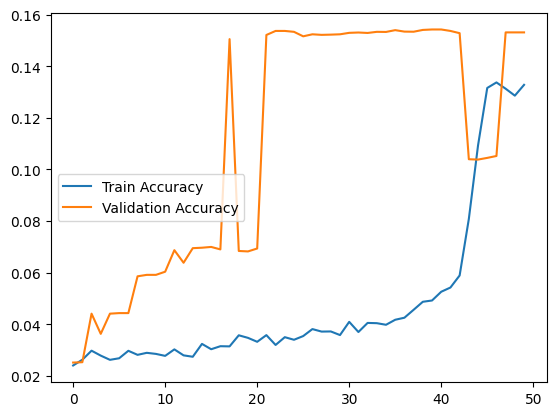

Model saved to /content/efficientnet_custom_model.h5


In [17]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

# Define the function to preprocess the image (resize, normalize, etc.)
def preprocess_for_training(image_path, target_size=(224, 224)):
    if not isinstance(image_path, str):
        raise ValueError(f"Expected a file path (string), but got {type(image_path)}")
    img = image.load_img(image_path, target_size=target_size, color_mode='rgb')  # Ensure RGB mode
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values to range [0, 1]
    return img_array

# Prepare image data
image_data = np.array([preprocess_for_training(img) for img in image_paths])

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
    shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest'
)

augmented_images = []
for img in image_data:
    img = np.expand_dims(img, axis=0)
    aug_iter = datagen.flow(img, batch_size=1)
    augmented_images.append(next(aug_iter)[0])  # Correct usage of next() in iterator

augmented_images = np.array(augmented_images)
combined_image_data = np.concatenate([image_data, augmented_images], axis=0)
combined_text_sequences_padded = np.concatenate([text_sequences_padded, text_sequences_padded], axis=0)

# Handle Class Imbalance (Oversampling)
combined_data = list(zip(combined_image_data, combined_text_sequences_padded))
majority_class = [data for data in combined_data if len(data[1]) > 10]
minority_class = [data for data in combined_data if len(data[1]) <= 10]

# Ensure minority class is not empty
if len(minority_class) > 0:
    minority_oversampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)
    balanced_data = majority_class + minority_oversampled
else:
    print("Minority class is empty, skipping resampling.")
    balanced_data = majority_class

balanced_image_data = np.array([data[0] for data in balanced_data])
balanced_text_sequences_padded = np.array([data[1] for data in balanced_data])

# Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    balanced_image_data, balanced_text_sequences_padded, test_size=0.2, random_state=42
)

# Load pre-trained EfficientNetB0 model without the top layers
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.RepeatVector(max_text_length)(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
predictions = layers.TimeDistributed(layers.Dense(len(tokenizer.word_index) + 1, activation='softmax'))(x)

# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(X_train, np.expand_dims(y_train, -1),
                    epochs=50, batch_size=16, validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Save the model
model.save('/content/efficientnet_custom_model.h5')
print("Model saved to /content/efficientnet_custom_model.h5")

In [19]:
from tensorflow.keras.models import load_model
import numpy as np

# Load the saved model
model = load_model('/content/efficientnet_custom_model.h5')

# Preprocess a test image (ensure the path is correct)
test_image_path = '/content/train_dataset/train_images/ocr_page_1.png'
test_image = preprocess_for_training(test_image_path)

# Expand the dimensions of the image to match the input shape (batch size of 1)
test_image = np.expand_dims(test_image, axis=0)

# Make prediction using the trained model
predictions = model.predict(test_image)

# Decode the predictions (assuming a tokenizer is available)
predicted_sequence = np.argmax(predictions, axis=-1)

# Convert the predicted sequence to text (you will need the tokenizer used during training)
predicted_text = tokenizer.sequences_to_texts(predicted_sequence)

# Print the predicted text
print("Predicted text from image:", predicted_text[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
Predicted text from image:                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          